In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_pickle("../../data/processed/balanced_df.pkl")

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [3]:
df.isnull().sum()

text     133552
label         0
dtype: int64

In [4]:
print(type(X_train))
print(X_train.head())

<class 'pandas.core.series.Series'>
128137                                                  NaN
90685                                                   NaN
94238                                                   NaN
16928     lol dem operative tied to hillary quits after ...
98897                                                   NaN
Name: text, dtype: object


In [5]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [6]:
# Only if you want to remove literal "nan" strings too
# mask = X_train != 'nan'
# X_train = X_train[mask]
# y_train = y_train[mask]

In [7]:
X_train.head()

16928     lol dem operative tied to hillary quits after ...
165003    monica lewinsky wrote an obituary for roger ai...
16637     clinton leading trump by 2 points in mcclatchy...
8970      britain urged iran to release detained dual na...
108570    syrian opposition says un talks are in great d...
Name: text, dtype: object

In [11]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.9,
    min_df=2,
    ngram_range=(1,2),
    max_features=50000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf_s = X_test.astype(str)
X_test_tfidf = tfidf.transform(X_test_tfidf_s)

nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf, y_train)

cnb = ComplementNB(alpha=0.5)
cnb.fit(X_train_tfidf, y_train)


ComplementNB(alpha=0.5)

In [12]:
y_pred = nb.predict(X_test_tfidf)
cnb_pred = cnb.predict(X_test_tfidf)

              precision    recall  f1-score   support

        FAKE       0.54      0.99      0.70     17023
        REAL       0.91      0.15      0.26     17023

    accuracy                           0.57     34046
   macro avg       0.73      0.57      0.48     34046
weighted avg       0.73      0.57      0.48     34046



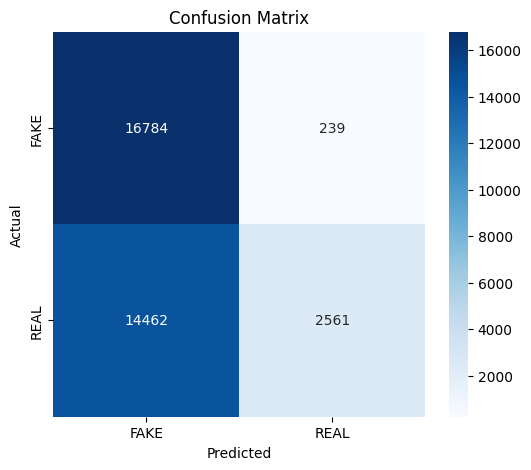

In [13]:
print(classification_report(y_test, cnb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, cnb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

        FAKE       0.54      0.99      0.70     17023
        REAL       0.93      0.15      0.26     17023

    accuracy                           0.57     34046
   macro avg       0.74      0.57      0.48     34046
weighted avg       0.74      0.57      0.48     34046



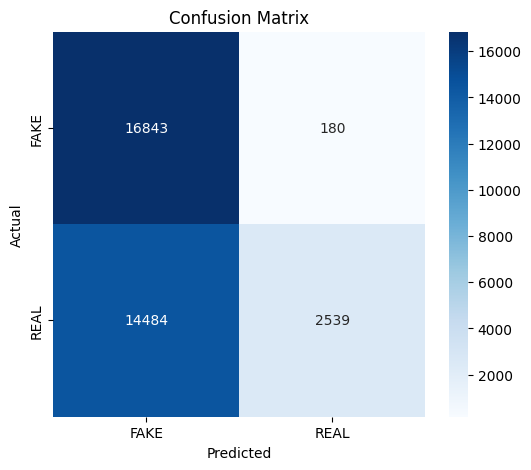

In [15]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()